In [1]:
import ai2thor
from ai2thor.controller import Controller
from ai2thor.platform import CloudRendering
from ithor_tools.vis_tool import *
from ithor_tools.transform import cornerpoint_projection
from ithor_tools.map import single_scenemap
"AI2-THOR Version: " + ai2thor.__version__

'AI2-THOR Version: 4.2.0'

In [2]:
controller = Controller()
controller.reset(
    # makes the images a bit higher quality
    width=800,
    height=800,

    # Renders several new image modalities
    renderDepthImage=True,
    renderInstanceSegmentation=False,
    renderSemanticSegmentation=False,
    renderNormalsImage=False
)


<ai2thor.server.Event at 0x7ff5076f9cd0
    .metadata["lastAction"] = Initialize
    .metadata["lastActionSuccess"] = True
    .metadata["errorMessage"] = "
    .metadata["actionReturn"] = {'cameraNearPlane': 0.10000000149011612, 'cameraFarPlane': 20.0}
>

-4.400001049041748 1.5 -2.799999713897705 3.200000286102295
-4.25 1.5 -2.75 3.0
(24, 24)


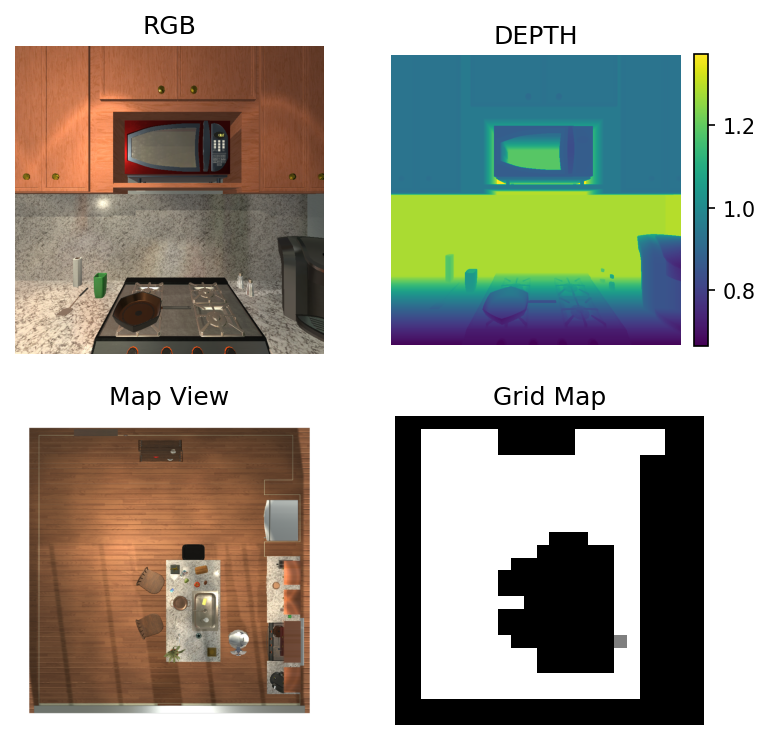

In [3]:
scene_bounds = controller.last_event.metadata['sceneBounds']['center']
controller.step(
    action="AddThirdPartyCamera",
    position=dict(x=scene_bounds['x'], y=2.5, z=scene_bounds['z']),
    rotation=dict(x=90, y=0, z=0),
    orthographic=True,
    orthographicSize=3.25,
    skyboxColor="white"
)
scene_bounds = controller.last_event.metadata['sceneBounds']['cornerPoints']
scene_bounds = cornerpoint_projection(scene_bounds)
controller.step(dict(action='GetReachablePositions'))
rstate = controller.last_event.metadata['actionReturn']
sm = single_scenemap(scene_bounds,rstate)

pos = controller.last_event.metadata['agent']['position']
pos = [pos['x'],pos['z']]

imshow_grid = sm.plot(pos)
plot_frames(controller.last_event,imshow_grid)

{'x': 0.9000012874603271, 'y': 0.9000135064125061, 'z': 0.09999952465295792}
{'x': 0.9000017642974854, 'y': 0.9000076651573181, 'z': 0.0999993309378624}


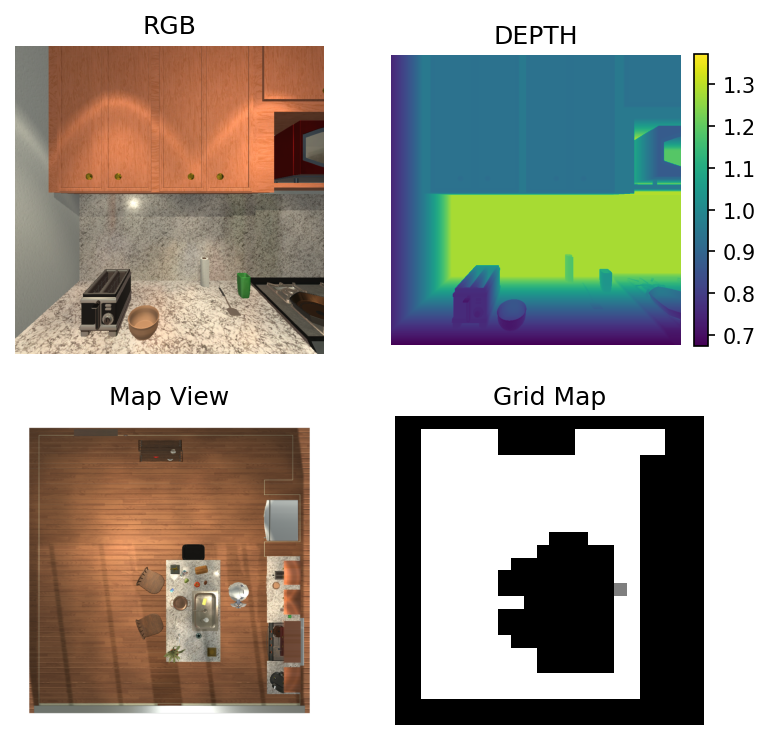

In [19]:
objects = controller.last_event.metadata["objects"]
for o in objects:
  if o['objectId'] == "Toaster|+00.98|+00.90|+00.33":
    print(o['position'])
controller.step(
    action="PlaceObjectAtPoint",
    objectId="Toaster|+00.98|+00.90|+00.33",
    position={
        "x": 0.9,
        "y": 1.0,
        "z": -1.0
    }
)
objects = controller.last_event.metadata["objects"]
for o in objects:
  if o['objectId'] == "Toaster|+00.98|+00.90|+00.33":
    print(o['position'])
pos = controller.last_event.metadata['agent']['position']
pos = [pos['x'],pos['z']]

imshow_grid = sm.plot(pos)
plot_frames(controller.last_event,imshow_grid)